이하 코드는 "파이썬으로 배우는 머신러닝의 교과서" 8장 딥러닝(CNN) 예제와 설명입니다.

# MNIST 필기체 숫자 분류해보기

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


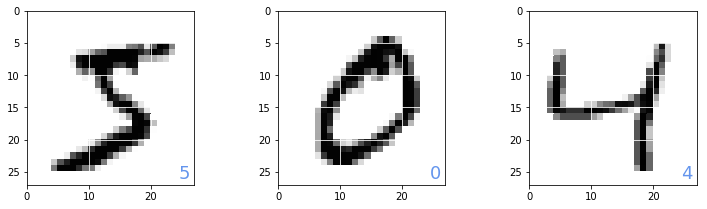

In [6]:
#-- 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace= 0.5)
plt.gray()
for id in range(3):                  # 저장된 처음 3개의 이미지 표시
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],        # y_train. 아직 원핫코드로 변경이 안됨
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

In [7]:
#-- 리스트 8-1-(3)
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # 28*28 사이즈 이미지 60000장 -> 784 크기 벡터 60000개
x_train = x_train.astype('float32') 
x_train = x_train / 255               # 255로 나눠서 (0~1)값의 실수로 받게함
num_classes = 10                      # 분류할 클래스 갯수
y_train = np_utils.to_categorical(y_train, num_classes) # 원핫코드 변환


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
#-- 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential() 
model.add(Dense(16, input_dim=784, activation='sigmoid')) # 중간층
model.add(Dense(10, activation='softmax'))                # 출력층
model.compile(loss='categorical_crossentropy',            # 교차엔트로피 사용 / Adaptive moment estimation (경사하강법) / 정확도 측정
              optimizer=Adam(), metrics=['accuracy']) # (D)

In [9]:
#-- 리스트 8-1-(5)
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 2.0609 - acc: 0.2892 - val_loss: 1.7850 - val_acc: 0.5013
Epoch 2/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.6044 - acc: 0.6525 - val_loss: 1.4359 - val_acc: 0.7675
Epoch 3/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.3181 - acc: 0.7885 - val_loss: 1.1971 - val_acc: 0.8203
Epoch 4/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.1120 - acc: 0.8249 - val_loss: 1.0180 - val_acc: 0.8445
Epoch 5/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.9534 - acc: 0.8438 - val_loss: 0.8785 - val_acc: 0.8588
Epoch 6/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.8299 - acc: 0.8590 - val_loss: 0.7710 - val_acc: 0.8710
Epoch 7/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.7349 - acc: 0.8692 - val_loss: 0.6876 - val_acc: 0.88

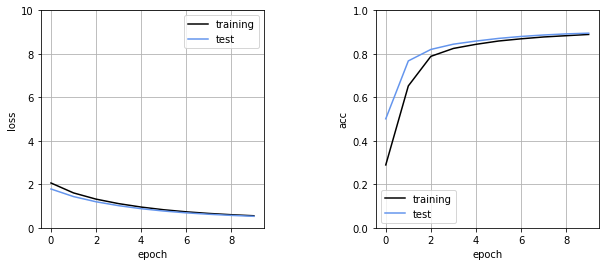

In [10]:
#-- 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

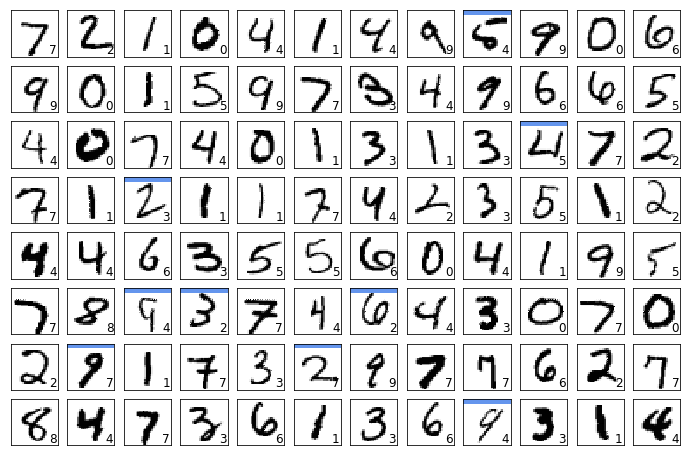

In [11]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96               # 보여줄 이미지 갯수
    y = model.predict(x_test) # x_test에 대한 값을 y로 받음
    plt.figure(1, figsize=(12, 8)) # 
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)  # 벡터를 다시 28 * 28 사이즈로
        plt.pcolor(1 - x)
        wk = y[i, :]           
        prediction = np.argmax(wk)  # y의 확률값들 중 가장 큰것을 받아서 우측 하단에 표현하기
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

# 정확도가 90%정도이므로 꽤 많이 틀림

In [12]:
#-- 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # 중간층의 활성함수만 렐루로 바꿈
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 1.5478 - acc: 0.5415 - val_loss: 0.8997 - val_acc: 0.8072
Epoch 2/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.6675 - acc: 0.8449 - val_loss: 0.4989 - val_acc: 0.8772
Epoch 3/10
60000/60000 [==============================] - 1s 8us/step - loss: 0.4517 - acc: 0.8827 - val_loss: 0.3903 - val_acc: 0.9001
Epoch 4/10
60000/60000 [==============================] - 1s 8us/step - loss: 0.3757 - acc: 0.8987 - val_loss: 0.3399 - val_acc: 0.9103
Epoch 5/10
60000/60000 [==============================] - 1s 8us/step - loss: 0.3355 - acc: 0.9077 - val_loss: 0.3106 - val_acc: 0.9165
Epoch 6/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.3096 - acc: 0.9132 - val_loss: 0.2921 - val_acc: 0.9201
Epoch 7/10
60000/60000 [==============================] - 0s 8us/step - loss: 0.2914 - acc: 0.9176 - val_loss: 0.2763 - val_acc: 0.9

# 활성함수만 렐루로 바꾸니 3%정도 정확도가 상승함

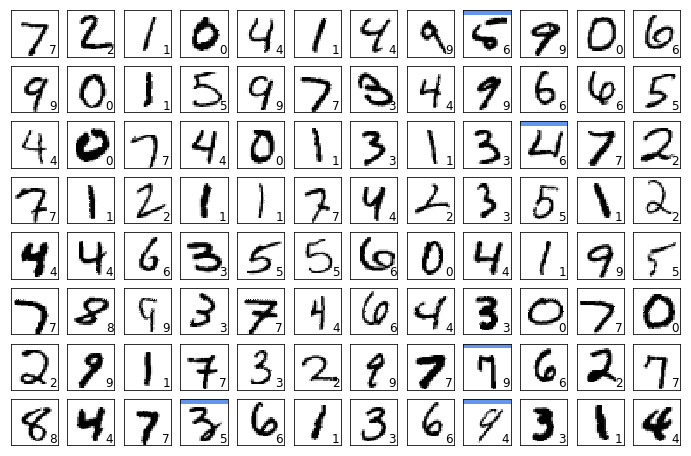

In [13]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

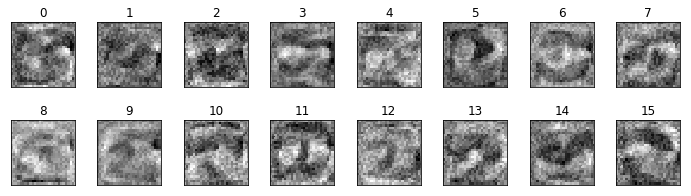

In [14]:
#-- 리스트 8-1-(10)
# 1층째의 무게 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

# 학습된 가중치 시각화

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [16]:
#-- 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

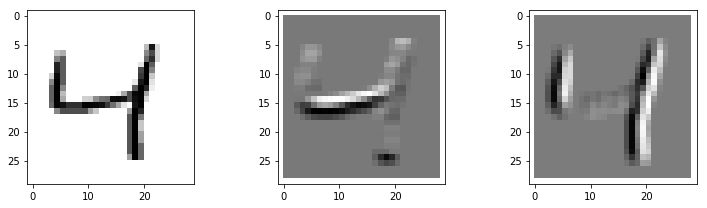

In [17]:
#-- 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

# 위의 필터 2개로 뽑아낸 feature map 2장을 시각화해서 표현

In [18]:
#-- 리스트 8-2-(3)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',                   # 3*3 필터를 8개 사용한다, padding은 출력 크기가 똑같도록, 바이어스는 자동
                 input_shape=(28, 28, 1), activation='relu')) # 28*28사이즈를 흑백으로(1)  / 컬러일경우 3
                                                              # 출력은 (배치 갯수, 필터 수, 출력 이미지 세로사이즈, 가로사이즈)
model.add(Flatten()) # 필터층 출력을 다음층 입력에 맞도록 차원 변환
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.7707 - acc: 0.8152 - val_loss: 0.3388 - val_acc: 0.9045
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.3162 - acc: 0.9092 - val_loss: 0.2741 - val_acc: 0.9214
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.2648 - acc: 0.9256 - val_loss: 0.2409 - val_acc: 0.9341
Epoch 4/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2300 - acc: 0.9353 - val_loss: 0.2121 - val_acc: 0.9425
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2019 - acc: 0.9441 - val_loss: 0.1900 - val_acc: 0.9486
Epoch 6/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1807 - acc: 0.9501 - val_loss: 0.1711 - val_acc: 0.9540
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1620 - acc: 0.9556 - val_loss: 0.1580 

단순히 벡터처리가 아닌, 28*28사이즈의 공간정보를 포함한 이미지를
 Convolution layer를 이용하여 학습시킴
# 정확도가 4%정도 증가

In [19]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) 
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

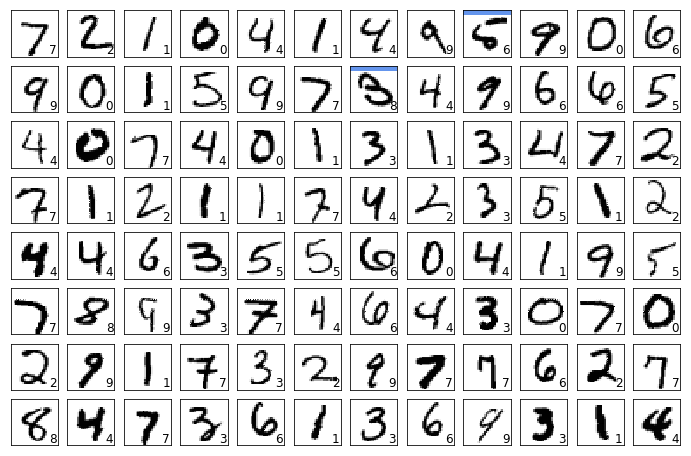

In [20]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

# 이제 오인식한 샘플은 2개밖에 없다

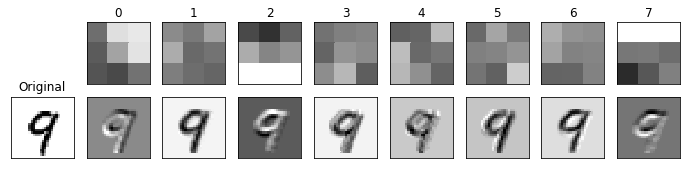

In [21]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

# 학습된 필터를 시각화해서 표현

In [22]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),                      # 3*3 사이즈 16장 컨볼루션 필터------------------1
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))  # 3*3 사이즈 32장 컨볼루션 필터------------------2
model.add(MaxPooling2D(pool_size=(2, 2)))         # 2*2 맥스풀링층 출력 사이즈가 반으로 줄어듦(14)-3
model.add(Conv2D(64, (3, 3), activation='relu'))  # 3*3 사이즈 64장 컨볼루션 필터------------------4
model.add(MaxPooling2D(pool_size=(2, 2)))         # 2*2 맥스풀링층 출력 사이즈가 반으로 줄어듦(7)--5
model.add(Dropout(0.25))                          # 드롭아웃 25%-----------------------------------5
model.add(Flatten())                              # 차원 조정--------------------------------------5
model.add(Dense(128, activation='relu'))          # 전결합층 / 렐루--------------------------------6
model.add(Dropout(0.25))                          # 드롭아웃 25%-----------------------------------6
model.add(Dense(num_classes, activation='softmax')) # 출력층  -------------------------------------7


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 60s 995us/step - loss: 0.6236 - acc: 0.8078 - val_loss: 0.1164 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 58s 974us/step - loss: 0.1296 - acc: 0.9614 - val_loss: 0.0623 - val_acc: 0.9798
Epoch 3/20
60000/60000 [==============================] - 59s 977us/step - loss: 0.0860 - acc: 0.9737 - val_loss: 0.0461 - val_acc: 0.9858
Epoch 4/20
60000/60000 [==============================] - 59s 976us/step - loss: 0.0673 - acc: 0.9788 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 5/20
60000/60000 [==============================] - 58s 975us/step - loss: 0.0561 - acc: 0.9827 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 6/20
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0287 - val_acc: 0.9906
Epoch 7/20
60000/60000 [==============================] - 59s 982us/step - loss: 0.0453 - acc: 0.9859 - val_loss: 0.02

KeyboardInterrupt: 

# 너무 오래걸려서 99%에서 학습중지시킴

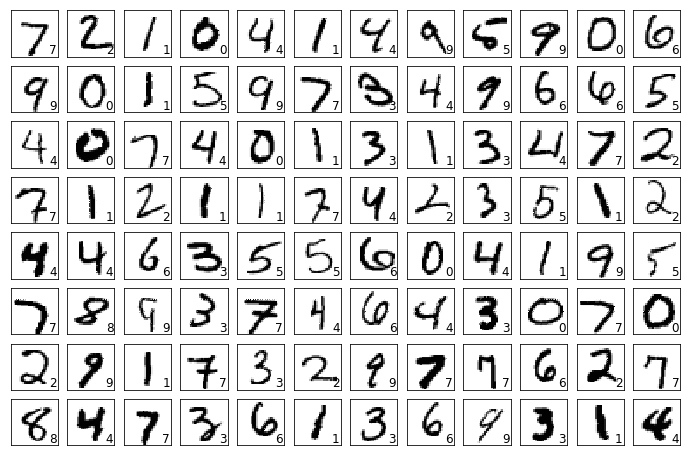

In [23]:
# 리스트 8-2-(7)
show_prediction()
plt.show()

# 이제 저장된 이미지의 첫 96개에서 오인식된 샘플은 없다